In [1]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 1: Basic Operation on Images - Number Display

In this task, you have to write a simple [Halftoning Program](https://en.wikipedia.org/wiki/Halftone) to create a B&W number display. Aim for this assignment is to check your basic image manipulation skills.

Our Number Display should contain **3 digits**. Each digit should be made using **5x3 dot patterns** (Radius of dot patterns should be **25 pixels**. A single digit should enclose within a rectangle of **300x180 pixels**. Your number display should enclose within a rectangle of **300x660 pixel** wide rectangle. There should be a space of **60 pixels** between two digits.

**This is how your display should be if N = 123:**

![](https://github.com/ee604/ee604_assignments/raw/master/assignment_1/imgs/t1_example.jpg)

**Examples of single digits**

![](https://github.com/ee604/ee604_assignments/raw/master/assignment_1/imgs/t1_digits.jpg)

In [2]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-akyj_bvt
  Created wheel for ee604-plugins: filename=ee604_plugins-0.1.2-cp36-none-any.whl size=2083 sha256=62058a22d354b1f4756dc5c6677d5a9add630315a3c25006c37a97eb03d14e5d
  Stored in directory: /tmp/pip-ephem-wheel-cache-oitk4ug0/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-akyj_bvt


In [3]:
# Importing required libraries

import cv2
import numpy as np
from ee604_plugins import cv2_imshow

In [4]:
def generate_number_display(N=123):
    '''
    Write your program to generate 3 digit number display as described above. 
    Digits should be white and background black.
    
    Inputs:
    + N - A '3' digit number to be printed.
    
    Ouputs:
    + out_img - your 300x660 numpy array (of dtype np.uint8) as the display image.
              - For white pixel use value = 255
              - For black pixel use value = 0
    
    Allowed external package:
    + You can use cv2.circle to draw dots. 
    + You are not allowed to use any other external package.
    
    Hint:
    + Create a masking array to place white dots across a black 300x660 display image.
    
    '''
    out_img = np.zeros((300, 660), dtype=np.uint8) # Intialise with blank display
    
    #############################
    # Start your code from here #
    #############################
    
    # Sanity check and conversion to string
    if N < 10:
        N = '00' + str(N)
    elif N < 100:
        N = '0' + str(N)
    else:
        N = str(N)

    w = 60 # gapt to be given between digits
    r = 25 # Radius of circle
    pattern = {} # Dictionary to store the digit pattern
    
    pattern['0'] = [[1,1,1],[1,0,1],[1,0,1],[1,0,1],[1,1,1]]
    pattern['1'] = [[0,1,0],[0,1,0],[0,1,0],[0,1,0],[0,1,0]]
    pattern['2'] = [[1,1,1],[0,0,1],[1,1,1],[1,0,0],[1,1,1]]
    pattern['3'] = [[1,1,1],[0,0,1],[1,1,1],[0,0,1],[1,1,1]]
    pattern['4'] = [[1,0,1],[1,0,1],[1,1,1],[0,0,1],[0,0,1]]
    pattern['5'] = [[1,1,1],[1,0,0],[1,1,1],[0,0,1],[1,1,1]]
    pattern['6'] = [[1,1,1],[1,0,0],[1,1,1],[1,0,1],[1,1,1]]
    pattern['7'] = [[1,1,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1]]
    pattern['8'] = [[1,1,1],[1,0,1],[1,1,1],[1,0,1],[1,1,1]]
    pattern['9'] = [[1,1,1],[1,0,1],[1,1,1],[0,0,1],[1,1,1]]

    x = 0
    for num in N:
        dig = pattern[num]
        for i in range(5):
            for j in range(3):
                if dig[i][j]:
                    centre = (x + 5 + 10*(j) + r + 2*r*j, 5 + 10*(i) + r + 2*r*i)
                    out_image = cv2.circle(out_img, centre , r, (255) ,-1)
        x += 180 + w
    
    #############################
    # End your code here ########
    #############################    
    
    return np.uint8(out_img)

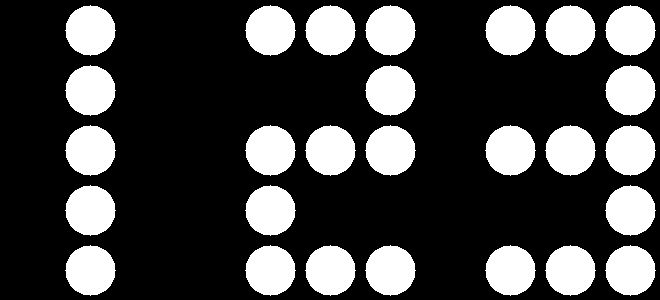

In [5]:
# Test Run
img = generate_number_display()
cv2_imshow(img)

In [6]:
# Submission >>>>>>>>>>>>>>>>>>>>>
# Do not change codes inside this cell otherwise our autograder will fail.

test_numbers = [604, 987, 645, 159, 963, 248]

gen_imgs = []
for N in test_numbers:
    gen_imgs.append(generate_number_display(N=N))
    
task1_submission = np.array(gen_imgs)